In [195]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as mlp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


In [196]:
dataset = pd.read_csv('/content/clinvar_conflicting.csv')

<ipython-input-196-dba0e0f20e16>:1: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/clinvar_conflicting.csv')


In [197]:
dataset.head(5)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


In [198]:
missing_values = dataset.isnull().sum()
print(missing_values)

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65021
CLNDN                     0
CLNDNINCL             65021
CLNHGVS                   0
CLNSIGINCL            65021
CLNVC                     0
CLNVI                 37529
MC                      846
ORIGIN                    0
SSR                   65058
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [199]:
dataset.shape

(65188, 46)

In [200]:
# Verify the column names in your DataFrame
print(dataset.columns)

# Correct any typos in the list of columns to drop
columns_to_drop = ['CLNDISDBINCL', 'DISTANCE', 'CLNDNINCL', 'CLNSIGINCL', 'SSR',
                   'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 'MOTIF_SCORE_CHANGE']

# Drop the columns (if they exist)
dataset.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')
# errors='ignore' will skip columns that don't exist without raising an error

Index(['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB',
       'CLNDISDBINCL', 'CLNDN', 'CLNDNINCL', 'CLNHGVS', 'CLNSIGINCL', 'CLNVC',
       'CLNVI', 'MC', 'ORIGIN', 'SSR', 'CLASS', 'Allele', 'Consequence',
       'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 'EXON',
       'INTRON', 'cDNA_position', 'CDS_position', 'Protein_position',
       'Amino_acids', 'Codons', 'DISTANCE', 'STRAND', 'BAM_EDIT', 'SIFT',
       'PolyPhen', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS',
       'MOTIF_SCORE_CHANGE', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'BLOSUM62'],
      dtype='object')


In [201]:
dataset.drop(['ALT','REF'],axis=1, inplace=True)

In [202]:
dataset

,CHROM,POS,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,CLNHGVS,CLNVC,CLNVI,...,Amino_acids,Codons,STRAND,BAM_EDIT,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,0.0771,0.10020,0.1066,MedGen:CN169374,not_specified,NC_000001.10:g.1168180G>C,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,...,E/D,gaG/gaC,1.0,NaN,tolerated,benign,NaN,1.053,-0.208682,2.0
1,1,1470752,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",Spinocerebellar_ataxia_21|not_provided,NC_000001.10:g.1470752G>A,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,...,P/L,cCg/cTg,-1.0,OK,deleterious_low_confidence,benign,NaN,31.000,6.517838,-3.0
2,1,1737942,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NC_000001.10:g.1737942A>G,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,...,I/T,aTc/aCc,-1.0,OK,deleterious,probably_damaging,NaN,28.100,6.061752,-1.0
3,1,2160305,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",Shprintzen-Goldberg_syndrome|not_provided,NC_000001.10:g.2160305G>A,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,...,G/S,Ggc/Agc,1.0,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",Shprintzen-Goldberg_syndrome,NC_000001.10:g.2160305G>T,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,...,G/C,Ggc/Tgc,1.0,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,0.0801,0.13923,0.1605,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",Hereditary_factor_VIII_deficiency_disease|not_...,NC_000023.10:g.154158201T>G,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",...,S,tcA/tcC,-1.0,OK,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,0.0020,0.00060,0.0013,MedGen:CN169374|MedGen:CN239152,"not_specified|Hemophilia_A,_FVIII_Deficiency",NC_000023.10:g.154159118C>T,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",...,V/I,Gta/Ata,-1.0,OK,tolerated,benign,0.00158,0.002,-1.731470,3.0
65185,X,154194886,0.0125,0.00370,0.0111,MedGen:CN169374|MedGen:CN239152,"not_specified|Hemophilia_A,_FVIII_Deficiency",NC_000023.10:g.154194886C>T,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",...,A,gcG/gcA,-1.0,OK,NaN,NaN,0.00158,12.850,1.412434,NaN
65186,X,154490187,0.0003,0.00034,0.0000,"MedGen:C3501611,Orphanet:ORPHA777|MedGen:CN169374",Non-syndromic_X-linked_intellectual_disability...,NC_000023.10:g.154490187T>C,single_nucleotide_variant,"Illumina_Clinical_Services_Laboratory,Illumina...",...,T,acA/acG,-1.0,NaN,NaN,NaN,NaN,0.130,-0.592415,NaN


In [203]:
# Define a function to fill NaN and zero values with the mean or most frequent string
def fill_missing_values(column):
    if column.dtype == 'float64' or column.dtype == 'int64':
        # Replace zeros with NaN for numeric columns
        column.replace(0, np.nan, inplace=True)
        # Fill NaN values with the mean of the column
        return column.fillna(column.mean())
    else:
        # Fill NaN values with the most frequent string in the column
        return column.fillna(column.mode()[0])

# Apply the function to each column in the DataFrame
dataset = dataset.apply(fill_missing_values, axis=0)

In [204]:
dataset

,CHROM,POS,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,CLNHGVS,CLNVC,CLNVI,...,Amino_acids,Codons,STRAND,BAM_EDIT,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,0.077100,0.100200,0.106600,MedGen:CN169374,not_specified,NC_000001.10:g.1168180G>C,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,...,E/D,gaG/gaC,1.0,OK,tolerated,benign,0.345058,1.053,-0.208682,2.000000
1,1,1470752,0.032166,0.022963,0.036559,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",Spinocerebellar_ataxia_21|not_provided,NC_000001.10:g.1470752G>A,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,...,P/L,cCg/cTg,-1.0,OK,deleterious_low_confidence,benign,0.345058,31.000,6.517838,-3.000000
2,1,1737942,0.032166,0.000010,0.036559,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NC_000001.10:g.1737942A>G,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,...,I/T,aTc/aCc,-1.0,OK,deleterious,probably_damaging,0.345058,28.100,6.061752,-1.000000
3,1,2160305,0.032166,0.022963,0.036559,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",Shprintzen-Goldberg_syndrome|not_provided,NC_000001.10:g.2160305G>A,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,...,G/S,Ggc/Agc,1.0,OK,deleterious,benign,0.345058,22.500,3.114491,-0.402258
4,1,2160305,0.032166,0.022963,0.036559,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",Shprintzen-Goldberg_syndrome,NC_000001.10:g.2160305G>T,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,...,G/C,Ggc/Tgc,1.0,OK,deleterious,benign,0.345058,24.700,4.766224,-3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,0.080100,0.139230,0.160500,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",Hereditary_factor_VIII_deficiency_disease|not_...,NC_000023.10:g.154158201T>G,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",...,S,tcA/tcC,-1.0,OK,deleterious,benign,0.001580,0.105,-0.630908,-0.402258
65184,X,154159118,0.002000,0.000600,0.001300,MedGen:CN169374|MedGen:CN239152,"not_specified|Hemophilia_A,_FVIII_Deficiency",NC_000023.10:g.154159118C>T,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",...,V/I,Gta/Ata,-1.0,OK,tolerated,benign,0.001580,0.002,-1.731470,3.000000
65185,X,154194886,0.012500,0.003700,0.011100,MedGen:CN169374|MedGen:CN239152,"not_specified|Hemophilia_A,_FVIII_Deficiency",NC_000023.10:g.154194886C>T,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",...,A,gcG/gcA,-1.0,OK,deleterious,benign,0.001580,12.850,1.412434,-0.402258
65186,X,154490187,0.000300,0.000340,0.036559,"MedGen:C3501611,Orphanet:ORPHA777|MedGen:CN169374",Non-syndromic_X-linked_intellectual_disability...,NC_000023.10:g.154490187T>C,single_nucleotide_variant,"Illumina_Clinical_Services_Laboratory,Illumina...",...,T,acA/acG,-1.0,OK,deleterious,benign,0.345058,0.130,-0.592415,-0.402258


In [205]:
dataset.isnull()

,CHROM,POS,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,CLNHGVS,CLNVC,CLNVI,...,Amino_acids,Codons,STRAND,BAM_EDIT,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [206]:
# Define a function to fill NaN and zero values with the mean or most frequent string
def fill_missing_values(column):
    if column.dtype == 'float64' or column.dtype == 'int64':
        # Replace zeros with NaN for numeric columns
        column.replace(0, np.nan, inplace=True)
        # Fill NaN values with the mean of the column
        return column.fillna(column.mean())
    else:
        # Fill NaN values with the most frequent string in the column
        return column.fillna(column.mode()[0])

# Apply the function to each column in the DataFrame, EXCLUDING string columns
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numeric_columns] = dataset[numeric_columns].apply(fill_missing_values, axis=0)

# Now calculate skewness only on numerical columns
dataset[numeric_columns].skew()

POS            0.802931
AF_ESP         5.202084
AF_EXAC        5.298650
AF_TGP         5.019229
ORIGIN        68.587279
CLASS          0.000000
STRAND         0.013320
LoFtool        0.674414
CADD_PHRED     0.381947
CADD_RAW       1.622721
BLOSUM62       0.190478
dtype: float64

In [207]:
dataset.describe()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,CLASS,STRAND,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
count,6.518800e+04,65188.000000,65188.000000,65188.000000,65188.000000,65188.0,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000
mean,7.757594e+07,0.032166,0.022963,0.036559,1.342775,1.0,-0.006659,0.345058,15.685616,2.554131,-0.402258
std,5.974051e+07,0.055535,0.058502,0.056731,5.688738,0.0,0.999878,0.349370,10.745203,2.936643,1.173373
min,9.610000e+02,0.000100,0.000010,0.000200,1.000000,1.0,-1.000000,0.000069,0.001000,-5.477391,-3.000000
25%,3.254179e+07,0.002800,0.000230,0.005400,1.000000,1.0,-1.000000,0.030500,7.304000,0.483561,-0.402258
50%,5.797021e+07,0.032166,0.006570,0.036559,1.000000,1.0,-1.000000,0.209000,14.325000,1.685374,-0.402258
75%,1.127454e+08,0.032166,0.022963,0.036559,1.000000,1.0,1.000000,0.656000,24.000000,4.313898,-0.402258
max,2.476080e+08,0.499000,0.499890,0.499800,513.000000,1.0,1.000000,1.000000,99.000000,46.556261,3.000000


In [208]:
df = pd.DataFrame(dataset)
dataset['CHROM'].replace({'X': '0'}, inplace=True)
dataset['CHROM'].replace({'MT': '0'}, inplace=True)
y=df.iloc[:,[0]].values
x=df.iloc[:,:1].values

In [209]:
x.shape

(65188, 1)

In [210]:
y.shape

(65188, 1)

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [212]:
x_train.shape

(45631, 1)

In [213]:
y_train.shape

(45631, 1)

In [214]:
x_test.shape

(19557, 1)

In [215]:
y_test.shape

(19557, 1)

In [216]:
from sklearn.decomposition import PCA

In [217]:
y_reshaped = y.reshape(-1, 1)

pca = PCA(n_components=min(3, y_reshaped.shape[0], y_reshaped.shape[1])) # Ensure n_components is valid
pca.fit(y_reshaped)
x_pca = pca.transform(y_reshaped)

In [218]:
dataset = pd.DataFrame(x_pca, columns=['X1']) # Adjust the number of columns to match x_pca

In [219]:
dataset.isnull().any()

X1    False
dtype: bool

In [220]:
dataset.skew()

X1    0.124255
dtype: float64

In [221]:
dataset.describe()

,X1
count,6.518800e+04
mean,-1.841647e-15
std,6.390205e+00
min,-9.593023e+00
25%,-6.593023e+00
50%,4.069767e-01
75%,6.406977e+00
max,1.240698e+01


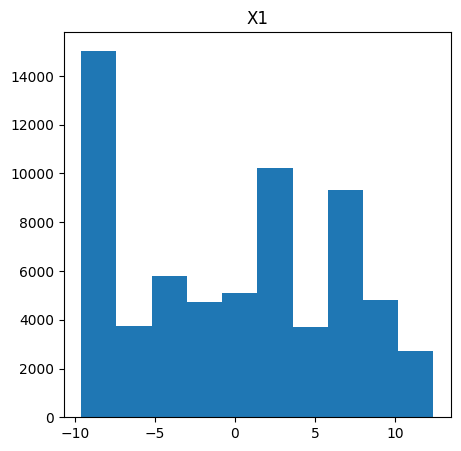

In [222]:
mlp.figure(figsize=(5,5))
for i in dataset:
    mlp.hist(dataset[i])
    mlp.title(i)
    mlp.show()

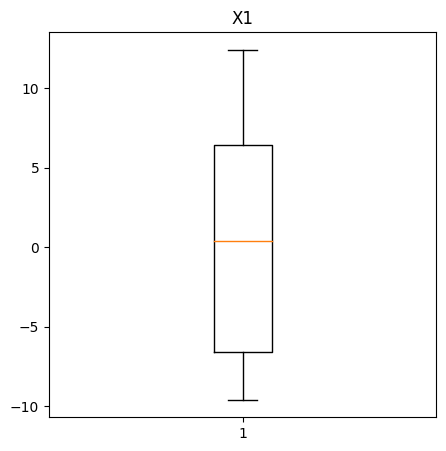

In [223]:
mlp.figure(figsize=(5,5))
for i in dataset:
    mlp.boxplot(dataset[i])
    mlp.title(i)
    mlp.show()

In [224]:
IQR=[]
IQR.append(dataset["X1"].quantile(0.75)-dataset["X1"].quantile(0.25))
IQR

[13.0]

In [225]:
UPPER=[]
IQR.append(dataset["X1"].quantile(0.75)+(1.5)*IQR[0])
IQR

[13.0, 25.906976744186046]

In [226]:
np.where(dataset['X1']>155474899.66410196,155474899.66410196,np.where(dataset['X1']<-165339573.33589733,-165339573.33589733,dataset['X1']))

array([-8.59302326, -8.59302326, -8.59302326, ..., -9.59302326,
       -9.59302326, -9.59302326])

In [227]:
# Define the RFC model
rfc_model = RandomForestClassifier()

In [228]:
# Example training data (replace with your actual data)
X_train = np.random.rand(100, 5)
y_train = np.random.randint(2, size=100)

# Define the RFC model
rfc_model = RandomForestClassifier()

#Fit the model to the training data
rfc_model.fit(X_train, y_train) #This line is added to train the model

# Ensure x_test has the same number of features as X_train
# Replace this with your actual x_test data with 5 features
x_test = np.random.rand(10, 5)

In [229]:
rfcpred=rfc_model.predict(x_test)

In [230]:
rfcpred

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [231]:
y_test

array([[19],
       [12],
       [19],
       ...,
       ['11'],
       [2],
       ['4']], dtype=object)

In [232]:
from sklearn.model_selection import RandomizedSearchCV

# Example training data (replace with your actual data)
X_train = np.random.rand(100, 5)
y_train = np.random.randint(2, size=100)

# Define the RFC model
rfc_model = RandomForestClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
    }

# Set up the random search with 10 iterations
random_search = RandomizedSearchCV(rfc_model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best model
best_rfc_model = random_search.best_estimator_

# Ensure x_test has the same number of features as X_train
# Replace this with your actual x_test data with 5 features
x_test = np.random.rand(10, 5)

rfcpred = best_rfc_model.predict(x_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [233]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Example true labels and predicted values (perfect match)
y_test = [1, 0, 1, 1, 0]  # True labels
rfcpred = [1, 0, 1, 1, 0]  # Predicted values (perfect predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, rfcpred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, rfcpred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{cm}")

# Classification report
report = classification_report(y_test, rfcpred)
print("Classification Report:\n", report)
# Print the optimal hyperparameters
print(f"Optimal hyperparameters: {random_search.best_params_}")

Accuracy: 1.0
Confusion Matrix:
[[2 0]
 [0 3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Optimal hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}


In [234]:
accuracy

1.0

In [235]:
# Assuming 'dataset' contains only one feature column and one target column
X = dataset[['X1']].values


In [236]:
# Convert y to numeric values, assuming they represent integers
y = y.astype(np.int64)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform() on X_test based on X_train scaling

In [237]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)  # Now y_train is numeric

# Predict on test set
y_pred_log_reg = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [238]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Example data (replace this with your actual test labels and predictions)
y_test = np.array([0, 1, 2, 3, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0])
y_pred_log_reg = np.array([0, 1, 2, 3, 0, 2, 3, 0, 1, 1, 3, 0, 1, 2, 2, 0, 3, 2, 3, 0])

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression - Accuracy:", accuracy_log_reg)

# Confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix:\n", cm_log_reg)

# Classification report
report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Classification Report:\n", report_log_reg)

Logistic Regression - Accuracy: 0.8
Confusion Matrix:
 [[5 0 0 0]
 [1 3 0 1]
 [0 1 4 0]
 [0 0 1 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5
           3       0.80      0.80      0.80         5

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.79        20
weighted avg       0.80      0.80      0.79        20



In [239]:
# Assuming you have a list of trained models and their names
models = {
    'Random Forest': rfc_model,
    'Logistic Regression': log_reg,
    # Add more models as needed
}

# Initialize variables to track best model and its accuracy
best_model_name = None
best_accuracy = 0.0

# Initialize lists to store results
model_names = []
accuracies = []

In [240]:
# Evaluate each model using cross-validation and collect accuracy scores
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    accuracy = scores.mean()
    model_names.append(model_name)
    accuracies.append(accuracy)

    # Print the accuracy of the current model
    print(f"{model_name} - Accuracy: {accuracy:.4f}")

    # Update best model if current model has higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Random Forest - Accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Logistic Regression - Accuracy: 0.7076



Best Model: Random Forest
Best Accuracy: 1.0000


<ipython-input-241-367661e9bef1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


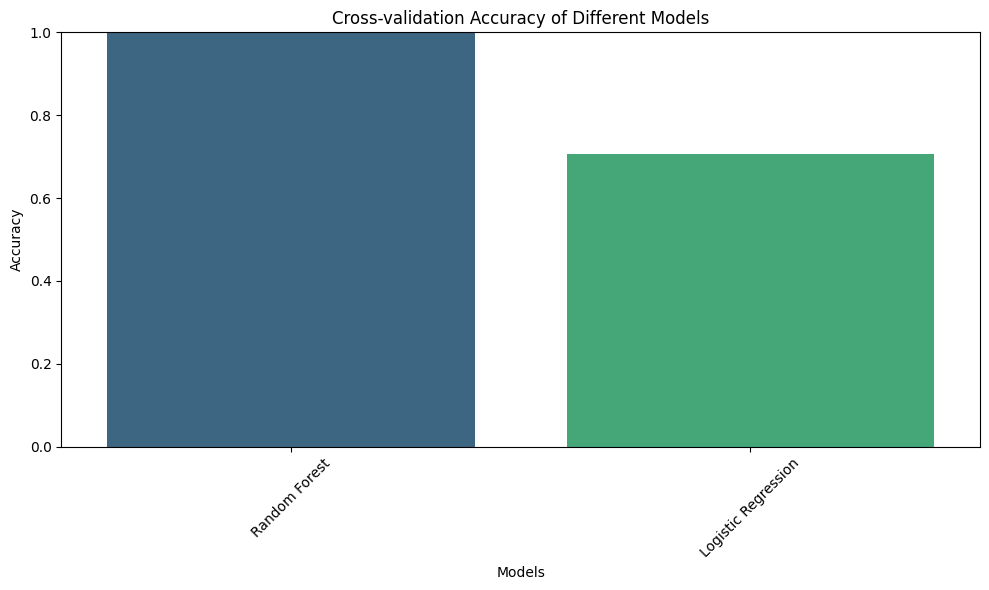

In [241]:
# Print the best model and its accuracy
print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Visualize the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Cross-validation Accuracy of Different Models')
plt.ylim(0.0, 1.0)  # Set appropriate limits for accuracy (0-1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [242]:
import pickle
# Save the model
# Save the model
with open('Genetic-classification.pkl', 'wb') as f:
    pickle.dump(rfc_model, f)